# Data Driven FWI: Prediction on Simulated Dataset

> Sanish Bhochhibhoya and [Joseph P. Vantassel](https://www.jpvantassel.com/)

## License Information
This file is part of _FWIPrePostAI_ - Shear Wave Velocity Prediction with data-driven Full Waveform Inversion (FWI) models.

    Copyright (C) 2025 Bhochhibhoya S. (sbhochhi@vt.edu) and Vantassel J.P. (jpvantassel@vt.edu)
    
    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.
    
    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.
    
    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.

## About _FWIPrePostAI_

`FWIPrePostAI` is a Python-based toolkit designed to predict shear wave velocity profiles from waveform datasets using pre-trained artificial intelligence (AI) models. The repository includes tools for working with both simulated and real-field data, and features a pre-trained model developed by Vantassel and Bhochhibhoya (2025).

This work facilitates rapid and data-driven full waveform inversion (FWI) for geotechnical applications, lowering the technical barrier for non-expert users while maintaining robust predictive performance.

## Citation

If you use `FWIPrePostAI` in your research or consulting, we ask you please cite the following:

> Vantassel, J. P. and Bhochhibhoya, S. (2025). “Toward More-Robust, AI-enabled Subsurface Seismic Imaging for Geotechnical Applications.” Computers and Geotechnics. [In-Review]

## About this notebook
This notebook illustrates how to perform a data-driven FWI on simulated data using the Vantassel and Bhochhibhoya (2025) model.

### Data Format Requirements:
1) The provided simulated testing data in the generated_data directory is in HDF5 format. It contains 500 of the 10,000 waveform-image pairs from Vantassel and Bhochhibhoya (2025).
2) For the Vantassel and Bhochhibhoya (2025) model, the waveform data should have a shape of 24 × 1000, representing 24 receivers and 1 second of data recorded at 1000 Hz. The preprocessing procedure outlined by Vantassel and Bhochhibhoya (2025), which includes truncating the waveforms to 500 milliseconds and excluding the two central receivers, will be applied automatically.
3) When using your own datasets, if the simulation is 3D, the user should apply the correction procedure proposed by Forbriger et al. (2014).

## Getting Started

1) Begin by following the instructions provided in the repository’s [README.md](https://github.com/geoimaging/fwiprepostai/blob/main/README.md?tab=readme-ov-file#getting-started) file to download the software and install the required dependencies.
2) To run the default example, open this notebook in JupyterLab, then navigate to `Kernel > Restart Kernel and Run All Cells`.
3) To explore additional examples, change the index number in the cell labeled __Data Input__ before restarting the kernel and running all cells.
4) After gaining familiarity with the provided examples, you are encouraged to experiment by applying the model to your own dataset.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

import fwiprepostai.data_analysis as data_analysis
import fwiprepostai.data_driven_fwi_models as fwi_models
import fwiprepostai.read_hdf5_file as read_hdf5_file

E0000 00:00:1749492639.921284   22832 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749492639.926545   22832 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749492639.945592   22832 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749492639.945641   22832 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749492639.945644   22832 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749492639.945646   22832 computation_placer.cc:177] computation placer already registered. Please check linka

In [2]:
# Loading the model weights of Vantassel and Bhochhibhoya (2025) model.
to_waveform_model_wt = r'./data/model_weights/VantasselAndBhochhibhoya2025.weights.h5'

# Loading the provided simulted dataset.
to_hdf5_file = r'./data/waveforms/generated_data/samples_500_116.hdf5'

# Change the index number to try different profiles (Allowed index values: 0 to 499)
# Note: 87, 252, 269 are used in Figure 4 of Vantassel and Bhochhibhoya 2025 paper.

index = 252

# Get the simulated waveform-profile pair. The actual profile will be used to compute the error metrics.
raw_waveform, vs_act = read_hdf5_file.get_data_from_hdf5(to_hdf5_file, index=index)  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


<Axes: title={'center': 'MAPE = 41%'}>

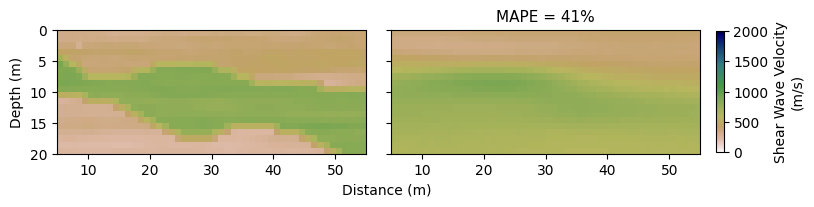

In [3]:
# Loading the Vantassel and Bhochhibhoya (2025) model.
model = fwi_models.VantasselAndBhochhibhoya2025(to_waveform_model_wt)

# Performing the prediction
vs_pred = data_analysis.get_prediction(model, raw_waveform, 0)[1]

# Computing the error_metrics
mape = data_analysis.get_accuracy(vs_act, vs_pred, 'mape')
data_analysis.plot_prediction(vs_act, vs_pred, 'mape', vmin=0, vmax=2000, extent = [5,55,20,0])